In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm, skew

from math import sqrt

In [2]:
data = pd.read_csv('train.csv')

In [3]:
print('Any missing values: ', data.isna().values.any())

Any missing values:  True


In [4]:
data.isna().sum().sort_values(ascending=False).head(30)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
TotRmsAbvGrd       0
GarageCars         0
dtype: int64

In [5]:
data.drop('Id', axis=1, inplace=True)

# Fill some categorical features' missing values with NA
data.FireplaceQu.fillna('NA', inplace=True)
data.PoolQC.fillna('NA', inplace=True)
data.MiscFeature.fillna('NA', inplace=True)
data.Alley.fillna('NA', inplace=True)
data.Fence.fillna('NA', inplace=True)
data.GarageFinish.fillna('NA', inplace=True)
data.GarageType.fillna('NA', inplace=True)
data.GarageQual.fillna('NA', inplace=True)
data.GarageCond.fillna('NA', inplace=True)
data.BsmtFinType1.fillna('NA', inplace=True)
data.BsmtFinType2.fillna('NA', inplace=True)
data.BsmtExposure.fillna('NA', inplace=True)
data.BsmtQual.fillna('NA', inplace=True)
data.BsmtCond.fillna('NA', inplace=True)
data.MasVnrType.fillna('NA', inplace=True)

# Fill other categorical features with most common terms
data.MSZoning.fillna('RL', inplace=True)
data.KitchenQual.fillna('TA', inplace=True)
data.Electrical.fillna('SBrkr', inplace=True)
data.Utilities.fillna('AllPub', inplace=True)
data.Functional.fillna('Typ', inplace=True)
data.Exterior2nd.fillna('VinylSd', inplace=True)
data.Exterior1st.fillna('VinylSd', inplace=True)
data.SaleType.fillna('WD', inplace=True)

# Fill numerical features' missing values with 0
data.LotFrontage.fillna(0, inplace=True)
data.GarageCars.fillna(0, inplace=True)
data.GarageArea.fillna(0, inplace=True)
data.BsmtFinSF1.fillna(0, inplace=True)
data.TotalBsmtSF.fillna(0, inplace=True)
data.GarageYrBlt.fillna(value=0, inplace=True)
data.MasVnrArea.fillna(0, inplace=True)
data.BsmtUnfSF.fillna(0, inplace=True)
data.BsmtFinSF2.fillna(0, inplace=True)
data.BsmtFullBath.fillna(0, inplace=True)
data.BsmtHalfBath.fillna(0, inplace=True)


In [6]:
data.isna().sum().sort_values(ascending=False).head(10)

MSSubClass      0
MSZoning        0
GarageYrBlt     0
GarageType      0
FireplaceQu     0
Fireplaces      0
Functional      0
TotRmsAbvGrd    0
KitchenQual     0
KitchenAbvGr    0
dtype: int64

/home/chescore/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


/home/chescore/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'House Prices')

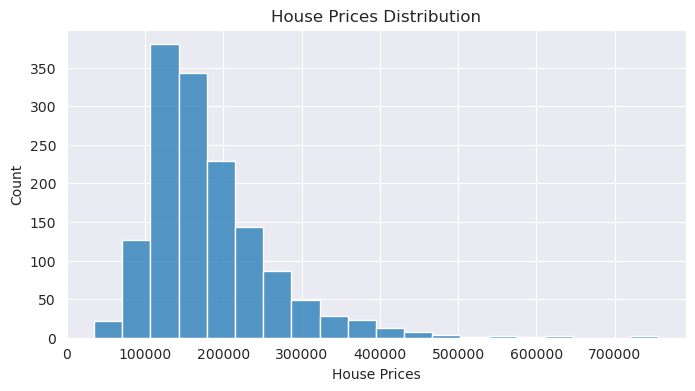

In [7]:
plt.figure(figsize=(8, 4))
sns.set_style('darkgrid')
sns.histplot(data=data, x='SalePrice', bins=20)
plt.title('House Prices Distribution')
plt.xlabel('House Prices')

In [16]:
# Select all features with strings
string_cols = data.select_dtypes(include=['object']).columns

# Convert categorical variables to numeric features
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

data[string_cols] = ordinal_encoder.fit_transform(data[string_cols])

array([], dtype=object)

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Remove warning messages
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

# Split data to training set and test set
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [10]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print('Root Mean Squared Error: ', round(sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_test)), 3))
print('Mean Absolute Error: ', round(mean_absolute_error(y_true=y_test, y_pred=y_pred_test), 3))
print('R2 Score: ', round(r2_score(y_true=y_test, y_pred=y_pred_test), 3))

Root Mean Squared Error:  32378.672
Mean Absolute Error:  18531.23
R2 Score:  0.824


Distribution Mean: 1.8092e+05, Skew: 1.8829 and Std Deviation: 7.9415e+04


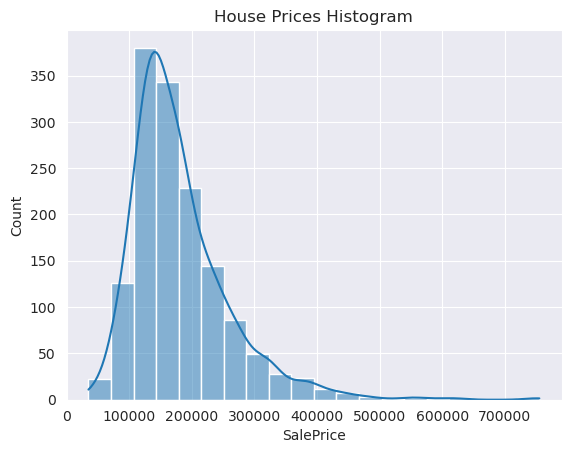

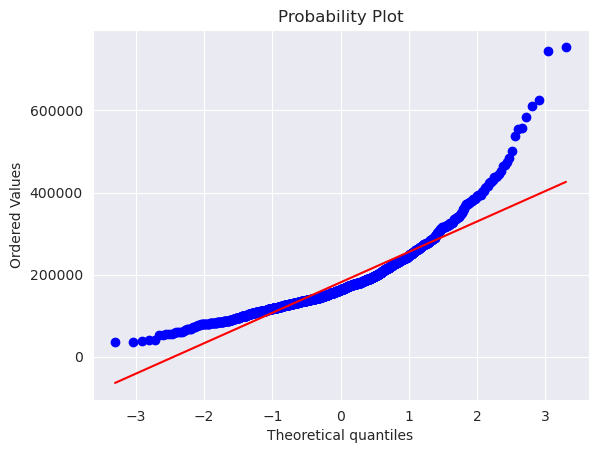

In [11]:
# Plot histogram of SalePrice again but this time with kde being equals to True
sns.histplot(data['SalePrice'], bins=20, kde=True)

(mu, sigma) = norm.fit(data['SalePrice'])
print(f'Distribution Mean: {mu:.5}, Skew: {data.SalePrice.skew():.5} and Std Deviation: {sigma:.5}')

plt.title('House Prices Histogram')

# QQ-Plot
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

Distribution Mean: 12.024, Skew: 0.12135, Std Deviation: 0.39931


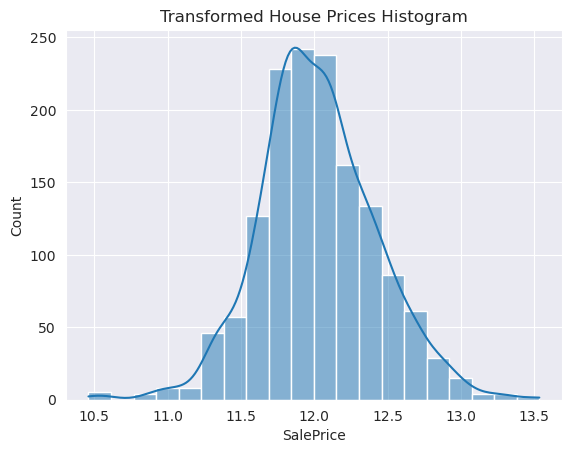

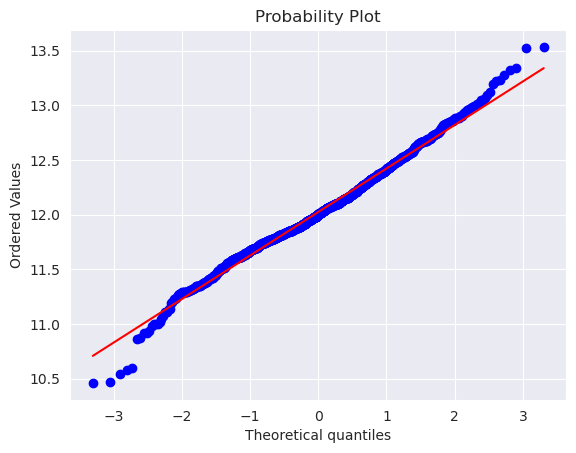

In [12]:
y_transformed = np.log1p(data.SalePrice)

sns.histplot(y_transformed, bins=20, kde=True)

(mu, sigma) = norm.fit(y_transformed)
print(f'Distribution Mean: {mu:.5}, Skew: {y_transformed.skew():.5}, Std Deviation: {sigma:.5}')

plt.title('Transformed House Prices Histogram')

# QQ-Plot
fig = plt.figure()
res = stats.probplot(y_transformed, plot=plt)
plt.show()

In [13]:
from sklearn.compose import TransformedTargetRegressor
rf = RandomForestRegressor()
log_rf = TransformedTargetRegressor(rf, func=np.log1p, inverse_func=np.expm1)
log_rf.fit(X_train, y_train)

y_pred_train = log_rf.predict(X_train)
y_pred_test = log_rf.predict(X_test)

print('Root Mean Squared Error: ', round(sqrt(mean_squared_error(y_true=y_test, y_pred=y_pred_test)), 3))
print('Mean Absolute Error: ', round(mean_absolute_error(y_true=y_test, y_pred=y_pred_test), 3))
print('R2 Score: ', round(r2_score(y_true=y_test, y_pred=y_pred_test), 3))

Root Mean Squared Error:  30704.001
Mean Absolute Error:  18183.264
R2 Score:  0.842
